# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [22]:
#imports
import cv2

---
## Step 0: Load The Data

In [13]:

# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [14]:
import numpy as np
assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))


# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print()
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [15]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import csv
import math
# Visualizations will be shown in the notebook.
%matplotlib inline


#Get Sign Name By ClassID
def displayCSV(fileName):
    signs_dict={}
    with open(fileName, 'rt') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=',')
        print("Label ID         SignName");
        for row in reader:
            print(row['ClassId']+"         "+row['SignName'])
            #signs_dict[row['ClassId']]=row['SignName']
    #return signs_dict[Id]


#Get Sign Name By ClassID
def getSignNameById(Id):
    signs_dict={}
    with open('signnames.csv', 'rt') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=',')
        for row in reader:
            signs_dict[row['ClassId']]=row['SignName']
    return signs_dict[Id]

#Show random Traffic Sign images from the Train Data Set
def showSampleImage(imageList,imageTitleList,number_of_samples=10,randomize=False,filter_class=None):
    hSize=16
    wSize=16
    
    if number_of_samples<= 5:
        number_of_col = number_of_samples
        number_of_row = 1
    else:
        number_of_col = 5
        number_of_row = math.ceil(number_of_samples/number_of_col)
        
    fig, axs= plt.subplots(number_of_row,
                           number_of_col, 
                           figsize=(hSize,wSize))
   
    fig.subplots_adjust(hspace = 0.1, 
                        wspace = 0.1 )
    axs = axs.ravel()
    
    cnt=0
    if filter_class !=None:
        for i in range(0,len(imageList)):
            if imageTitleList[i] == filter_class:
                image = imageList[i]
                axs[cnt].axis('off')
                axs[cnt].imshow(image)
                #axs[cnt].set_title(getSignNameById(str(imageTitleList[index]))+' '+str(image.shape))
                axs[cnt].set_title(getSignNameById(str(imageTitleList[i])))
                cnt+=1
                if cnt>number_of_samples-1:
                    break
    elif filter_class == None:             
        for i in range(0,number_of_samples):
            index = i
            if randomize:
                index = random.randint(0, len(imageList))
            image = imageList[index]
            axs[i].axis('off')
            axs[i].imshow(image)
            #axs[i].set_title(getSignNameById(str(imageTitleList[index]))+' '+str(image.shape))
            axs[i].set_title(getSignNameById(str(imageTitleList[index])))






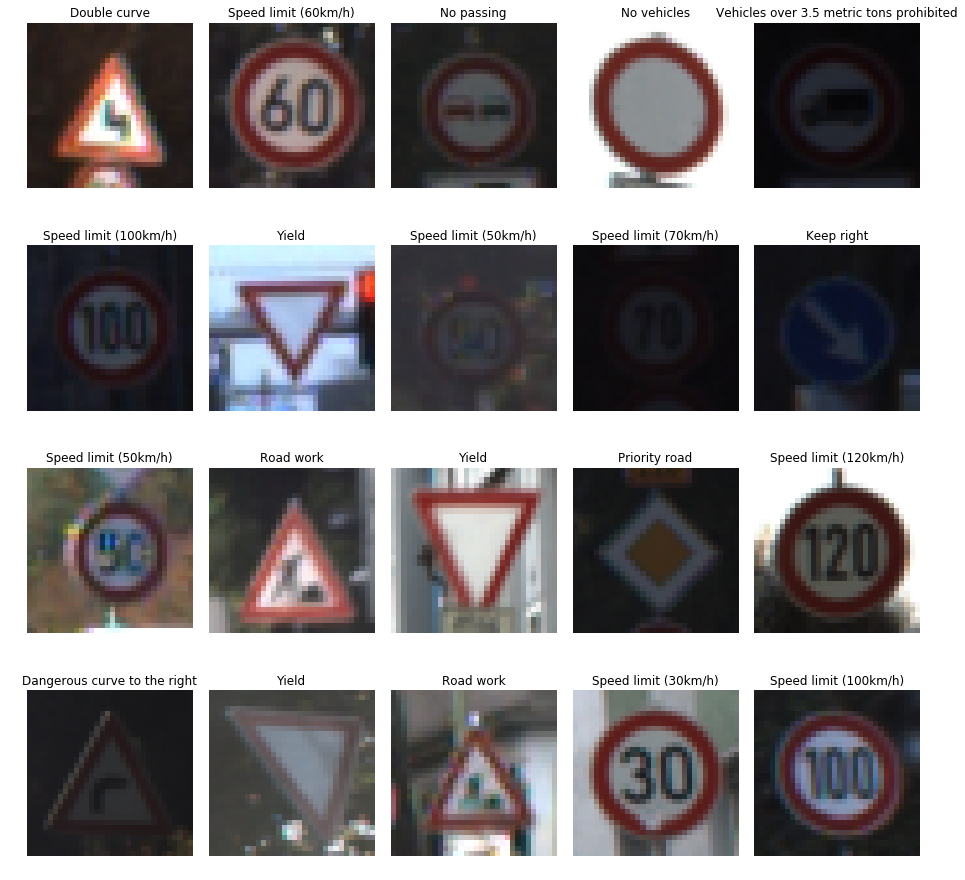

In [16]:
#show  random Images from the data set            
showSampleImage(X_train,y_train,20,randomize=True,filter_class=None)


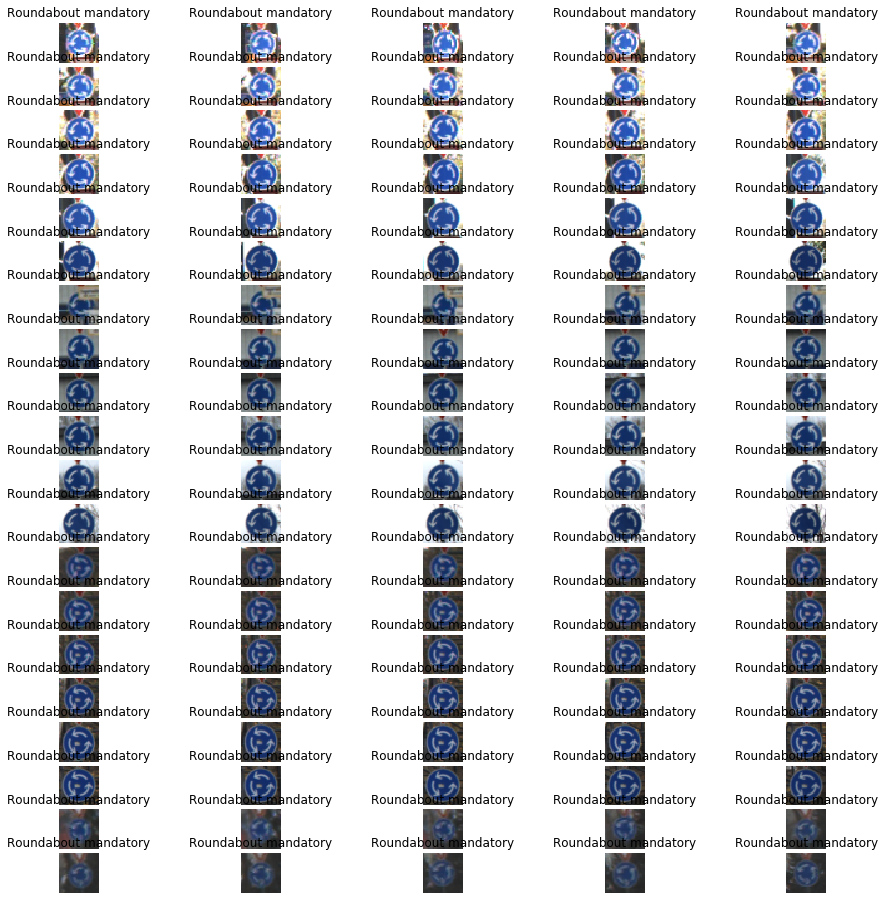

In [17]:
#show  random Images from the data set filter for a specific class   
#Let's explore samples from each class
showSampleImage(X_train,y_train,100,filter_class=40)


In [18]:
displayCSV('signnames.csv')


Label ID         SignName
0         Speed limit (20km/h)
1         Speed limit (30km/h)
2         Speed limit (50km/h)
3         Speed limit (60km/h)
4         Speed limit (70km/h)
5         Speed limit (80km/h)
6         End of speed limit (80km/h)
7         Speed limit (100km/h)
8         Speed limit (120km/h)
9         No passing
10         No passing for vehicles over 3.5 metric tons
11         Right-of-way at the next intersection
12         Priority road
13         Yield
14         Stop
15         No vehicles
16         Vehicles over 3.5 metric tons prohibited
17         No entry
18         General caution
19         Dangerous curve to the left
20         Dangerous curve to the right
21         Double curve
22         Bumpy road
23         Slippery road
24         Road narrows on the right
25         Road work
26         Traffic signals
27         Pedestrians
28         Children crossing
29         Bicycles crossing
30         Beware of ice/snow
31         Wild animals crossing
3

 

                   FREQUENCY DISTRIBUTION OF SIGN LABELS



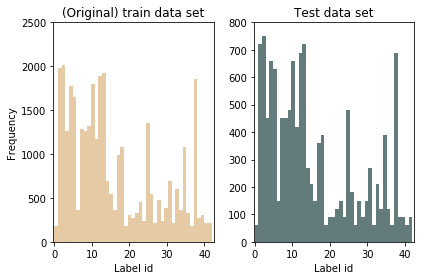

In [19]:
# Train data set - frequency distribution
plt.subplot(121)
plt.hist(y_train, n_classes, normed=0, facecolor='burlywood', alpha=0.75)
plt.xlabel('Label id')
plt.ylabel('Frequency')
plt.title('(Original) train data set')
plt.axis([-0.25, n_classes-.5, 0,2500])
plt.grid(False)

# Test data set - frequency distribution
plt.subplot(122)
plt.hist(y_test, n_classes, normed=0, facecolor='darkslategray', alpha=0.75)
plt.xlabel('Label id')
plt.title('Test data set')
plt.axis([-0.25, n_classes-.5, 0,800])
plt.grid(False)

plt.tight_layout()
print (" \n")
print("                   FREQUENCY DISTRIBUTION OF SIGN LABELS\n")
plt.show()

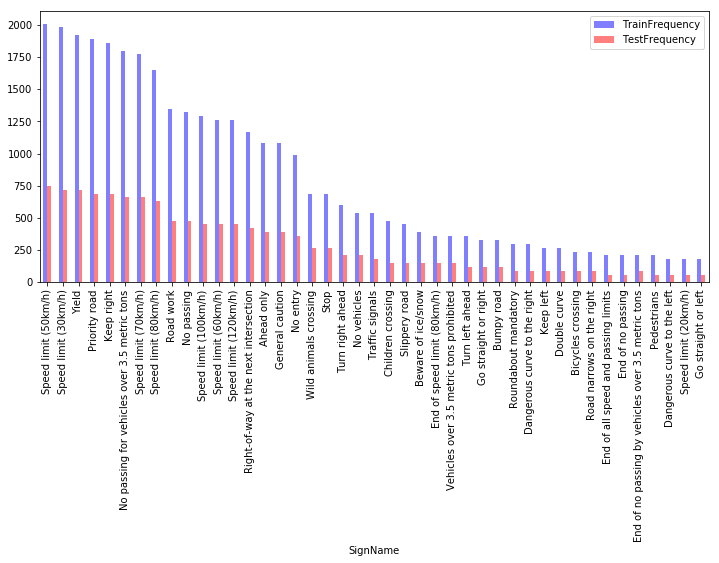

In [20]:
import pandas as pd
#load the the Sign Names
signnames = pd.read_csv('./signnames.csv')

# Build dataframe for training data
traindata = pd.DataFrame(y_train, columns=["ClassId"])
traindata = traindata.merge(signnames, how="left", left_on="ClassId", right_on="ClassId")
traindata = traindata.rename(columns={'ClassId': 'TrainFrequency'})
# Build dataframe for testing data
testdata = pd.DataFrame(y_test, columns=["ClassId"])
testdata = testdata.merge(signnames, how="left", left_on="ClassId", right_on="ClassId")
testdata["TestFrequency"] = 1

# Groupby for Test summary
datacount = traindata.groupby(["SignName"]).count()
datacount = datacount.join(testdata.groupby(["SignName"])["TestFrequency"].count())
datacount = datacount.sort_values(by="TrainFrequency", ascending=False)

datacount.plot.bar(figsize=(12, 5), color=['b','r'], width=.5, alpha=0.5)
plt.show()

In [23]:
## Todo
# Augment the dataset by rotating or shifting images or by changing colors

import sys
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os.path


# Provide some random effects. 
class ImageEffect:

    def random_effect(self, img):
        a = np.random.randint(0, 2, [1, 5]).astype('bool')[0]

        if a[0] == True:
            img = self.image_translate(img)
        if a[1] == True:
            img = self.image_rotate(img)
        if a[2] == True:
            img = self.image_shear(img)
        if a[3] == True:
            img = self.image_blur(img)
        if a[4] == True:
            img = self.image_gamma(img)
        return img


    def image_translate(self, img):
        x = img.shape[0]
        y = img.shape[1]

        x_shift = np.random.uniform(-0.3 * x, 0.3 * x)
        y_shift = np.random.uniform(-0.3 * y, 0.3 * y)

        shift_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
        shift_img = cv2.warpAffine(img, shift_matrix, (x, y))

        return shift_img


    def image_rotate(self, img):
        row, col, channel = img.shape

        angle = np.random.uniform(-60, 60)
        rotation_point = (row / 2, col / 2)
        rotation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, 1)

        rotated_img = cv2.warpAffine(img, rotation_matrix, (col, row))
        return rotated_img


    def image_shear(self, img):
        x, y, channel = img.shape

        shear = np.random.randint(5,15)
        pts1 = np.array([[5, 5], [20, 5], [5, 20]]).astype('float32')
        pt1 = 5 + shear * np.random.uniform() - shear / 2
        pt2 = 20 + shear * np.random.uniform() - shear / 2
        pts2 = np.float32([[pt1, 5], [pt2, pt1], [5, pt2]])

        M = cv2.getAffineTransform(pts1, pts2)
        result = cv2.warpAffine(img, M, (y, x))
        return result


    def image_blur(self, img):
        r_int = np.random.randint(0, 2)
        odd_size = 2 * r_int + 1
        return cv2.GaussianBlur(img, (odd_size, odd_size), 0)


    def image_gamma(self, img):
        gamma = np.random.uniform(0.3, 1.5)
        invGamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
        new_img = cv2.LUT(img, table)
        return new_img


class ImagePreprocessor():

    OUTPUT_FILE   = './traffic-signs-data/train_preprocessed.p'
    SCALE_FACTOR  = 3.5
    TRAINING_FILE = './traffic-signs-data/train.p'

    def __init__(self):
        plt.interactive(False)

        self.train_data = self.load_data()
        self.image_effect = ImageEffect()

        self.X_train = self.train_data['features']
        self.y_train = self.train_data['labels']

    def call(self):

        self.extended_data, self.extended_labels = self.augment_data(
            self.X_train,
            self.y_train,
            scale=self.SCALE_FACTOR
        )

        self.new_train_data = {
            'features': self.extended_data,
            'labels': self.extended_labels
        }

        self.save_data()

    def plot_samples(self):
        item, count = np.unique(self.y_train, return_counts=True)
        freq = np.array((item, count)).T

        item2, count2 = np.unique(self.extended_labels, return_counts=True)
        freq2 = np.array((item2, count2)).T


        print('Before Data Preprocessing: %d samples' % (self.y_train.shape[0]))

        plt.figure(1)
        plt.bar(item, count, alpha=0.2)
        plt.title('Before Data Preprocessing: Unequally Distributed Data')

        print('After Data Preprocessing: %d samples' % (self.extended_labels.shape[0]))

        plt.figure(2)
        plt.bar(item2, count2, alpha=0.2)
        plt.title('After Data Preprocessing: More Equally Distributed Data')

        plt.show()


    def augment_data(self, X_train, y_train, scale=2):
        total_traffic_signs = len(set(y_train))

        ts, imgs_per_sign   = np.unique(y_train, return_counts=True)

        avg_per_sign        = np.ceil(np.mean(imgs_per_sign)).astype('uint32')

        separated_data      = []

        for traffic_sign in range(total_traffic_signs):
            images_in_this_sign = X_train[y_train == traffic_sign, ...]
            separated_data.append(images_in_this_sign)

        expanded_data   = np.array(np.zeros((1, 32, 32, 3)))
        expanded_labels = np.array([0])

        for sign, sign_images in enumerate(separated_data):
            scale_factor = (scale*(avg_per_sign / imgs_per_sign[sign])).astype('uint32')
            print(sign, " ", avg_per_sign / imgs_per_sign[sign], " ", scale_factor)

            new_images = []

            for img in sign_images:
                for _ in range(scale_factor):
                    new_images.append(self.image_effect.random_effect(img))

            if len(new_images) > 0:
                sign_images = np.concatenate((sign_images, new_images), axis=0)

            new_labels      = np.full(len(sign_images), sign, dtype='uint8')

            expanded_data   = np.concatenate((expanded_data, sign_images), axis=0)
            expanded_labels = np.concatenate((expanded_labels, new_labels), axis=0)

        return expanded_data[1:], expanded_labels[1:]


    def save_data(self, output_path=OUTPUT_FILE):
        bytes_out = pickle.dumps(self.new_train_data)
        max_bytes = 2**31 - 1
        n_bytes   = sys.getsizeof(bytes_out)

        with open(output_path, 'wb') as f:
            for idx in range(0, n_bytes, max_bytes):
                f.write(bytes_out[idx:idx+max_bytes])

        return True

    def load_data(self, train_path=TRAINING_FILE):
        bytes_in = bytearray(0)
        input_size = os.path.getsize(train_path)
        max_bytes = 2**31 - 1

        with open(train_path, mode='rb') as f:
            for _ in range(0, input_size, max_bytes):
                bytes_in += f.read(max_bytes)
        train = pickle.loads(bytes_in)

        return train

# Perform Image Preprocessing 
#from image_preprocessor import ImagePreprocessor

image_preprocessor = ImagePreprocessor()
image_preprocessor.call()

# Output format:
"sign_class_type - (avg_per_sign / imgs_per_sign) - scale_factor"

0   4.5   15
1   0.409090909091   1
2   0.402985074627   1
3   0.642857142857   2
4   0.457627118644   1
5   0.490909090909   1
6   2.25   7
7   0.627906976744   2
8   0.642857142857   2
9   0.613636363636   2
10   0.45   1
11   0.692307692308   2
12   0.428571428571   1
13   0.421875   1
14   1.17391304348   4
15   1.5   5
16   2.25   7
17   0.818181818182   2
18   0.75   2
19   4.5   15
20   2.7   9
21   3.0   10
22   2.45454545455   8
23   1.8   6
24   3.375   11
25   0.6   2
26   1.5   5
27   3.85714285714   13
28   1.6875   5
29   3.375   11
30   2.07692307692   7
31   1.17391304348   4
32   3.85714285714   13
33   1.35225375626   4
34   2.25   7
35   0.75   2
36   2.45454545455   8
37   4.5   15
38   0.435483870968   1
39   3.0   10
40   2.7   9
41   3.85714285714   13
42   3.85714285714   13


'sign_class_type - (avg_per_sign / imgs_per_sign) - scale_factor'

In [24]:
new_training_data = image_preprocessor.new_train_data
new_features = new_training_data['features']
new_features = new_features/255 # scale pixel values to [0, 1]
new_labels   = new_training_data['labels']

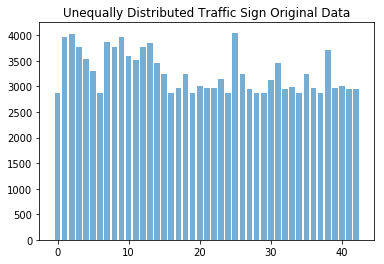

In [25]:
y_train = new_labels
X_train = new_features
# Create a barchart of frequencies for original data 
item, count = np.unique(y_train, return_counts=True)
freq = np.array((item, count)).T
plt.figure(1)
plt.bar(item, count, alpha=0.6)
plt.title('Unequally Distributed Traffic Sign Original Data')

plt.show()

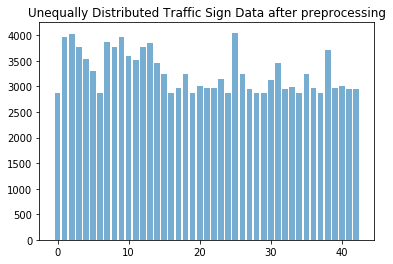

In [26]:
# Create a barchart of frequencies for modified data 
item, count = np.unique(new_labels, return_counts=True)
freq = np.array((item, count)).T
plt.figure(2)
plt.bar(item, count, alpha=0.6)
plt.title('Unequally Distributed Traffic Sign Data after preprocessing')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [27]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


def conv2GrayScale(X_train):
    return np.sum(X_train/3, axis=3, keepdims=True)


# Converting to grayscale
X_train_rgb = X_train
X_train_gry = conv2GrayScale(X_train)

X_test_rgb = X_test
X_test_gry = conv2GrayScale(X_test)

X_validation_rgb = X_validation
X_validation_gry = conv2GrayScale(X_validation)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)


X_train = X_train_gry
X_test = X_test_gry
X_validation = X_validation_gry

# TODO!! Visualize graysacle

RGB shape: (140365, 32, 32, 3)
Grayscale shape: (140365, 32, 32, 1)


In [28]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [29]:
## Normalize the train and test datasets to (-1,1)

def normalize(X_train):
    return (X_train-128)/128

X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)
X_validation_normalized = normalize(X_validation)

#X_train_normalized = (X_train-128)/128
#X_test_normalized = (X_test-128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))
print(np.mean(X_validation_normalized))

-0.997965659755
-0.358215153428
-0.347215411128


Original shape: (140365, 32, 32, 1)
Normalized shape: (140365, 32, 32, 1)


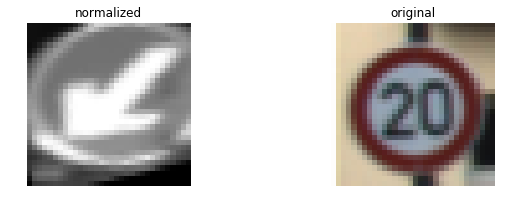

In [30]:
print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_normalized[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train_rgb[0].squeeze())

### Model Architecture

## SOLUTION: Implement Traffic Signs Classiffier
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [31]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def TsNet(x):    
     # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    W3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(120))    
    x = tf.add(tf.matmul(x, W3), b3)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    #x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(84)) 
    x = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    #x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(43)) 
    logits = tf.add(tf.matmul(x, W5), b5)
    
    return logits

print('done')

done


In [32]:
from tensorflow.contrib.layers import flatten


#Enhanced TsNet 
# Implemented:
#    - DropOut
# Todo:
#    - L2 Regularization
def TsNetEx(x):    
 with tf.device('/cpu:0'):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
     # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b)
    
    return logits

In [33]:
from tensorflow.contrib.layers import flatten

def LeNet2(x):    
       
    # Layer 1
    depth1 = 80
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, depth1)))
    conv1_b = tf.Variable(tf.zeros(depth1))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2
    depth2 = 120
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, depth1, depth2)))
    conv2_b = tf.Variable(tf.zeros(depth2))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
    # Flatten
    fc1 = flatten(conv2) 
    depth3 = 200
    
    # Layer 3 (fully connected)
    fc1_shape = (fc1.get_shape().as_list()[-1], depth3)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape)))
    fc1_b = tf.Variable(tf.zeros(depth3))
    fc1 = tf.matmul(fc1, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)

    # Output
    fc2_W = tf.Variable(tf.truncated_normal(shape=(depth3, 43)))
    fc2_b = tf.Variable(tf.zeros(43))
    return tf.matmul(fc1, fc2_W) + fc2_b

print('done')

done


## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [34]:
#Clears the default graph stack and resets the global default graph.
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

# To Control DropOut Rate
keep_prob = tf.placeholder(tf.float32) 

#Returns a one-hot tensor.
one_hot_y = tf.one_hot(y, 43)


print('done')

done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [35]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [36]:
EPOCHS = 100
BATCH_SIZE = 128
rate= 0.0009


logits = TsNetEx(x)


#Distance between the SoftMaX(Y) and one_hot encoded labels.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

#Average cross Entropy across the entire training set
loss_operation = tf.reduce_mean(cross_entropy)

#Training weights and biases
#optimizer = tf.train.AdamOptimizer(learning_rate = rate)
optimizer = tf.train.AdamOptimizer()
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [37]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        #accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('done')

done


## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [ ]:
import time
from tqdm import tqdm





# Measurements use for graphing loss and accuracy
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []
epoch_progress = []
batch_progress=0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    start = time.time()
    print("Training...")
    print()
    for i in range(EPOCHS):
        
         
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss=sess.run([training_operation,loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
            #_, loss=sess.run([training_operation,loss_operation], feed_dict={x: batch_x, y: batch_y})
            
            
            loss_batch.append(loss)
            batches.append(batch_progress)
            batch_progress+=BATCH_SIZE
        
        training_accuracy = evaluate(X_train,y_train)
        train_acc_batch.append(training_accuracy)
        
        validation_accuracy = evaluate(X_validation, y_validation)
        valid_acc_batch.append(validation_accuracy)
        
        epoch_progress.append(i)
        print("EPOCH {} ".format((i+1)))
        print("...Training Accuracy = {:.3f} ...Validation Accuracy = {:.3f} ...Loss = {:.3f}".format(training_accuracy,validation_accuracy,loss))

    end = time.time()
    print("Training Time :"+str((end - start)/60)+" Minutes")
    saver.save(sess, './tsnet')
    print("Model saved")
    
  

## Training Log
EPOCH 50 BATCH_SIZE=128 rate=0.001
Accuracy on Extra Test Image : 0.252
 
EPOCH 100 BATCH_SIZE=128 rate=0.0009
  Accuracy on Extra Test Image : 0.222
 
EPOCH 100, BATCH_SIZE=128, rate=0.001, Kp=0.6
 Accuracy on Extra Test Image : 0.083333
 
 EPOCH 50, BATCH_SIZE=128, rate=0.0009, Kp=0.5
 Accuracy on Extra Test Image : 0.0000
 
 
 EPOCH 200, BATCH_SIZE=128, rate=0.0009, Kp=0.65
 Accuracy on Extra Test Image : 0.0000

NameError: name 'batches' is not defined

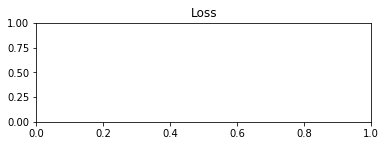

In [38]:
    #Visualizing loss across all data set during all EPOCHS
    loss_plot = plt.subplot(211)
    loss_plot.set_title('Loss')
    loss_plot.plot(batches,loss_batch,'g')
    loss_plot.set_ylim([0.0001,3])
    
    #Comparing accuracy for validation and training data during each EPOCH
    acc_plot = plt.subplot(212)
    acc_plot.set_title('Accuracy')
    acc_plot.plot(epoch_progress, train_acc_batch, 'r', label='Training Accuracy')
    acc_plot.plot(epoch_progress, valid_acc_batch, 'x', label='Validation Accuracy')
    acc_plot.set_ylim([0, 2.0])
    acc_plot.set_xlim([epoch_progress[0], epoch_progress[-1]])
    acc_plot.legend(loc=4)
    plt.tight_layout()
    plt.show()
   

## Evaluate the Model

In [39]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    print("\n  Training set accuracy = {:.3f}".format(evaluate(X_train, y_train)))
    print("Validation set accuracy = {:.3f}".format(evaluate(X_validation, y_validation)))
    print("      Test set accuracy = {:.3f}".format(evaluate(X_test, y_test)))


  Training set accuracy = 0.736
Validation set accuracy = 0.924
      Test set accuracy = 0.889


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

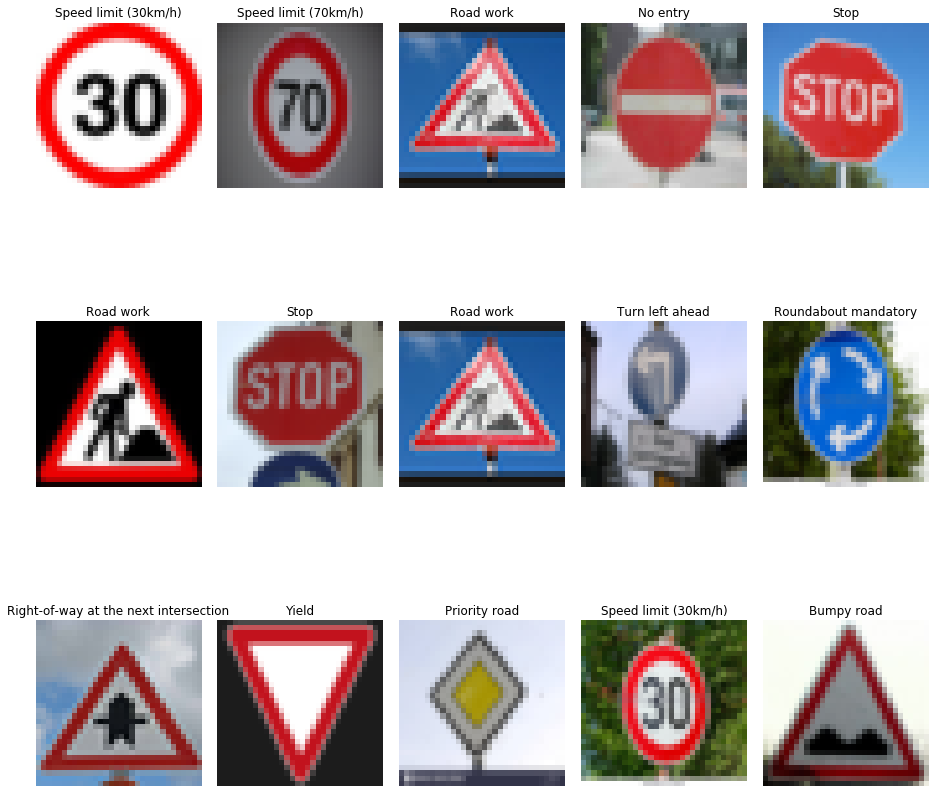

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import math
import cv2 
from scipy.misc import imresize

#Image File  Naming convention 
#   /\d*-class_\d*.['png','jpg']/

#img=mpimg.imread('./test_images/0-class_13.jpg')
#imgplot = plt.imshow(img)
#plt.show()

#f='0-class_12.jpg'
#int(f.split('_')[1].split('.')[0])


def load_extra_images(path):
    file_list = os.listdir(path)
    #print(file_list)
    images=[]
    labels=[]
    for file in file_list:
        img=cv2.imread(path+'/'+file)
        #img=mpimg.imread(path+'/'+file)
        img=imresize(img, [32,32])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        
        #images.append(img)
        labels.append(int(file.split('_')[1].split('.')[0]))
        #imgplot = plt.imshow(img)
        #plt.show()
        #print(int(file.split('_')[1].split('.')[0]))
    return images,labels
        

X_Extra=[]
y_extra=[]
X_Extra,y_extra=load_extra_images('./test_images')


showSampleImage(X_Extra,y_extra, len(X_Extra),randomize=False,filter_class=None)


(15, 32, 32, 3)
(15, 32, 32, 1)
4


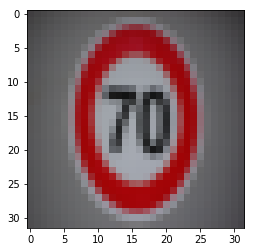

In [41]:

X_Extra=np.asarray(X_Extra)
X_Extra_grey = conv2GrayScale(X_Extra)
X_Extra_normalized = normalize(X_Extra_grey)
print(X_Extra.shape)
print(X_Extra_normalized.shape)

plt.imshow(X_Extra[1],cmap='gray')
print(y_extra[1])


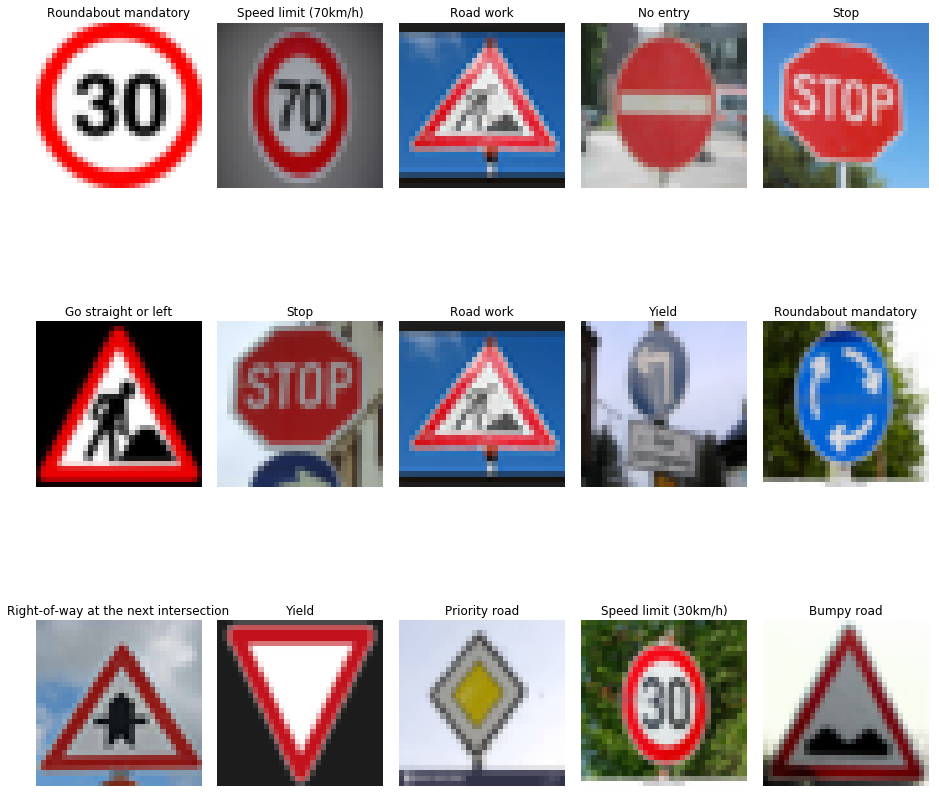

In [42]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    result=sess.run(logits, feed_dict={x: X_Extra_normalized, y: y_extra, keep_prob: 1.0})
    predicted_label = np.argmax(result, axis = 1)
    #print(predicted_label)
    
showSampleImage(X_Extra,predicted_label, len(X_Extra),randomize=False,filter_class=None)


In [43]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #print("\n  Training set accuracy = {:.3f}".format(evaluate(X_train[1:2], y_train[1:2])))
    print("Extra Test set accuracy = {:.6f}".format(evaluate(X_Extra_normalized, y_extra)))

Extra Test set accuracy = 0.800000


In [ ]:
plt.imshow(my_images2[4])
my_labels=[13, 17, 1,  12, 22, 12, 18, 25]
my_labels2=[1]
print(my_labels2)
my_images_normalized4=[]
my_images_normalized4.append(my_images_normalized[7])
print(my_images_normalized[7].shape)
image=my_images_normalized[7]
image=imresize(image, [32,32])
plt.imshow(image, cmap='gray')
#my_images_normalized2.append(my_images_normalized[1])


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Test set accuracy = {:.3f}".format(evaluate(my_images_normalized4, my_labels2)))

In [ ]:
print('Preprocessing additional pictures...')

# Iterate through grayscale
#add_pics_data = conv2GrayScale(add_pics_data)
#add_pics_data = add_pics_data[..., newaxis]

# Normalize
add_pics_data = normalize(add_pics_data) 

print('Finished preprocessing additional pictures.')

# Double-check that the image is changed to depth of 1
new_image_shape = add_pics_data.shape
print("Processed additional pictures shape =", new_image_shape)

In [ ]:
import glob


my_images = sorted(glob.glob('./test_images/*.jpg'))
my_labels = np.array([1, 22, 35, 15, 37, 18])

figures = {}
labels = {}
my_signs = []
index = 0
for my_image in my_images:
    img = cv2.cvtColor(cv2.imread(my_image), cv2.COLOR_BGR2RGB)
    my_signs.append(img)
    figures[index] = img
    #labels[index] = name_values[my_labels[index]][1].decode('ascii')
    index += 1
    plt.imshow(image)
    plt.show()


#showSampleImage(my_images,my_labels,4)
#plot_figures(figures, 3, 2, labels)

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import scipy.misc
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

NEW_IMAGES_FOLDER = './test_images/'


def resize_image(image_file):
    image = plt.imread(NEW_IMAGES_FOLDER + image_file)
    return skimage.transform.resize(image, (128, 128))

resized_image_data = [(resize_image(image), image[:-4]) 
                          for image in os.listdir(NEW_IMAGES_FOLDER)]

def display_images(imgs_data):
    index = 1
    plt.figure(figsize=(4,9))
    for img, name in imgs_data:
        plt.subplot(5, 1, index)
        plt.imshow(img)
        plt.axis('off')
        plt.title(name)
        index += 1
    plt.show()
    
display_images(resized_image_data)

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import os
import scipy.misc

import csv
reader = csv.reader(open('./signnames.csv'))

result = {}
for row in reader:
    key = row[0]
    if key in result:
        # implement your duplicate row handling here
        pass
    result[key] = row[1:]

NEW_IMAGES_FOLDER = './test_images/'

labels = {0: 'Yield',
          1: 'Speed limit (30 km/h)',
          2: 'Priority road',
          3: 'No entry',
          4: 'Bumpy road'}


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(prediction, feed_dict={x: , keep_prob: 1.0})
'''


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for i in range(5):
        image = plt.imread(NEW_IMAGES_FOLDER + str(i)+'.jpg')
        image = scipy.misc.imresize(image, (32, 32))
        image_grey= np.max(image,axis=-1,keepdims=1)/2+np.min(image,axis=-1,keepdims=1)/2
        #print(image_grey.shape)
        #plt.imshow(image)
        plt.axis('off')
        plt.title(labels[i])
        plt.show()
        
        classification = sess.run(tf.argmax(logits, 1), feed_dict={x: [image_grey]})
        softmax = tf.nn.softmax(logits)        
        normalized_prob = sess.run(softmax, feed_dict={x: [image]})
        top_k_op = tf.nn.top_k(normalized_prob, k=5)
        top_k_results = sess.run(top_k_op)
        
        print('CNN Prediction: ', result[str(classification[0])], '('+str(classification[0])+')')
        print('Top Results: ', top_k_results.values)
        print('Top Indices: ', top_k_results.indices)
        
'''

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import cv2

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")